In [1]:
import random
random.seed(1)
random.choice('ACGT')

'C'

In [2]:
def read_genome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = readGenome('lambda_virus.fa')

from collections import Counter

base_occurences = Counter(genome)
base_occurences
    

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

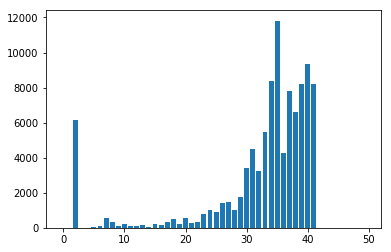

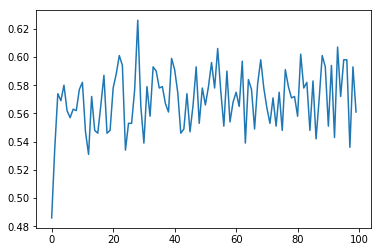

Counter({'T': 21836, 'A': 21132, 'C': 28272, 'G': 28742, 'N': 18})

In [23]:
import matplotlib.pyplot as plt
import collections

def read_fastq(filename):
    sequences = []
    qualities = []
    with open(filename, 'r') as f:
        while True:
            f.readline() # ignore first line
            seq = f.readline().rstrip()
            f.readline() # ignore 3rd line
            qual = f.readline().rstrip()
            if len(seq) == 0: # EOF
                break
            else:
                sequences.append(seq)
                qualities.append(qual)
    return sequences, qualities

sequences, qualities = read_fastq('SRR835775_1.first1000.fastq')

# Phred33: summing 33 to sequenced-base qualities (Q) and then converting them to ASCII encoded chars

def QToPhred33(num):
    return char(num + 33)

def phred33ToQ(char):
    return ord(char) - 33

def createHistogram(qualities):
    h = [0] * 50
    for qual in qualities:
        for phred in qual:
            Q = phred33ToQ(phred) 
            h[Q] += 1
    return h

histogram = createHistogram(qualities)
x = range(len(histogram))
y = histogram
plt.bar(x, y)
plt.show()

def findGCbyPosition(reads):
    G_or_C = [0] * 100
    total_bases = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] in ['G', 'C']:
                G_or_C[i] +=1
            total_bases[i] += 1

    for i in range(len(G_or_C)):
        if total_bases[i] > 0:
            G_or_C[i] /= float(total_bases[i])
    return G_or_C

gc = findGCbyPosition(sequences)
plt.plot(range(len(gc)), gc)
plt.show()

count_bases = collections.Counter()
for seq in sequences:
    count_bases.update(seq)

count_bases

